<a href="https://colab.research.google.com/github/jaab/AI---Deep-Learning-com-PyTorch-e-Python/blob/main/project_1_brest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLASSIFICAÇÃO BINÁRIA BREST CANCER

Etapa 1: Importação das bibliotecas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score


#!pip uninstall torch
#!pip install torch==2.1.2
import torch.torch_version
import torch.nn as nn



etapa 2 : base de dados

In [ ]:
np.random.seed(123)
torch.manual_seed(123)

In [ ]:
previsores = pd.read_csv('entradas_breast.csv')
classe = pd.read_csv('saidas_breast.csv')

In [ ]:
previsores.shape

(569, 30)

In [ ]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [ ]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
np.unique(classe)

array([0, 1])

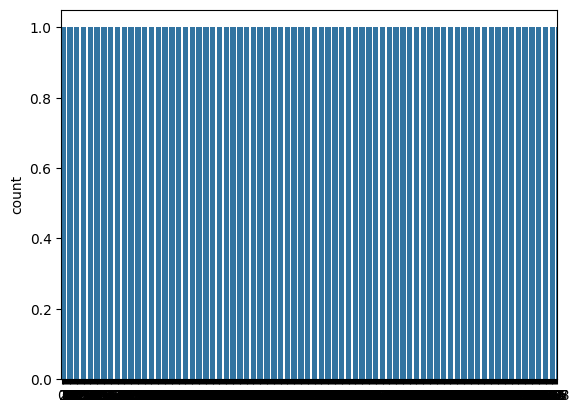

In [ ]:
sns.countplot(classe['0']);

In [ ]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,classe,test_size=0.25)

In [ ]:
previsores_treinamento.shape

(426, 30)

In [ ]:
classe_treinamento.shape

(426, 1)

In [ ]:
previsores_teste.shape

(143, 30)

In [ ]:
classe_teste.shape

(143, 1)

Etapa 3: transformação dos dados para tensores

In [ ]:
type(previsores_treinamento)

pandas.core.frame.DataFrame

In [ ]:
type(np.array(previsores_treinamento))

numpy.ndarray

In [ ]:
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype=torch.float)

In [ ]:
type(previsores_treinamento)


torch.Tensor

In [ ]:
type(classe_treinamento)

torch.Tensor

In [ ]:
dataset= torch.utils.data.TensorDataset(previsores_treinamento,classe_treinamento)

In [ ]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

etapa 4 : construção do modelo

In [ ]:
# 30 -> 16 -> 16 -> 1  quanto mais perto de '1' maligno perto de '0' maligno
# (entrada + saida) / 2 = (30 + 1) / 2 = 16
classificador = nn.Sequential(
    nn.Linear(in_features=30,out_features=16),
    nn.ReLU(),
    nn.Linear(16,16),
    nn.ReLU(),
    nn.Linear(16,1),
    nn.Sigmoid()
    )

In [ ]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [ ]:
criterion = nn.BCELoss()

In [ ]:
optimizer = torch.optim.Adam(classificador.parameters(),lr=0.001,weight_decay=0.0001)

etapa 5: treinamento do modelo

In [ ]:
for epoch in range(100):
  running_loss=0
  for data in train_loader:
    inputs, labels = data
    #print(inputs)
    #print('-----')
    #print(labels)
    optimizer.zero_grad()

    Outputs = classificador(inputs) # or classificador.forward(inputs)
    #print(Outputs)

    loss = criterion(Outputs,labels)  # valor do erro
    #print(loss)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    print('Época %3d: perda %.5f' % (epoch+1, running_loss/len(train_loader)))

Época   1: perda 0.00287
Época   1: perda 0.00990
Época   1: perda 0.02064
Época   1: perda 0.02191
Época   1: perda 0.02680
Época   1: perda 0.02742
Época   1: perda 0.03074
Época   1: perda 0.04080
Época   1: perda 0.04175
Época   1: perda 0.04508
Época   1: perda 0.05621
Época   1: perda 0.06378
Época   1: perda 0.06458
Época   1: perda 0.06954
Época   1: perda 0.07045
Época   1: perda 0.07162
Época   1: perda 0.08598
Época   1: perda 0.09046
Época   1: perda 0.09381
Época   1: perda 0.09747
Época   1: perda 0.09949
Época   1: perda 0.10007
Época   1: perda 0.10438
Época   1: perda 0.10823
Época   1: perda 0.10899
Época   1: perda 0.10989
Época   1: perda 0.11240
Época   1: perda 0.11287
Época   1: perda 0.11392
Época   1: perda 0.11817
Época   1: perda 0.12142
Época   1: perda 0.12563
Época   1: perda 0.12886
Época   1: perda 0.13117
Época   1: perda 0.13755
Época   1: perda 0.13829
Época   1: perda 0.13979
Época   1: perda 0.14487
Época   1: perda 0.14865
Época   1: perda 0.15134


Etapa 6: visualização dos dados

In [ ]:
# 30 -> 16 -> 16 -> 1
params= list(classificador.parameters())

In [ ]:
params

[Parameter containing:
 tensor([[-7.5231e-02, -2.6208e-01, -1.8774e-01,  5.5938e-02, -2.0504e-02,
           5.2484e-02,  7.4891e-02,  1.7737e-02, -2.4461e-01, -1.2934e-01,
           8.3073e-02,  3.4797e-02, -1.3063e-01, -1.1280e-01, -1.6694e-03,
           2.9135e-02, -4.0566e-01, -7.6411e-02,  3.6869e-01,  2.7572e-04,
           1.3076e-01, -2.5403e-01, -6.2227e-02,  1.3652e-01,  2.3120e-01,
           2.3502e-01, -4.8540e-01,  2.9622e-01,  4.0827e-01, -3.5925e-04],
         [ 2.0752e-01,  1.4378e-01,  3.4570e-01,  7.9420e-02, -1.4253e-01,
           5.6370e-02, -1.2731e-02, -1.8887e-01, -4.9695e-03,  2.6650e-01,
          -4.2159e-02, -7.1153e-02, -8.4303e-03,  1.9399e-01, -1.2078e-02,
          -1.1478e-01, -5.1081e-02,  1.4289e-01,  2.7647e-01, -1.2876e-02,
           1.0726e-01, -3.6428e-02,  2.3982e-01, -3.4328e-03,  8.5449e-02,
          -2.3281e-01, -2.5662e-01,  6.7379e-02, -9.8432e-02, -1.5172e-01],
         [ 5.8103e-03,  1.1070e-02, -2.2897e-01, -9.8166e-02, -3.0715e-03,


In [ ]:
# 30 -> 16 -> 16 -> 1
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [ ]:
#print(pesos0)

In [ ]:
# 30 -> 16 -> 16 -> 1
bias0= params[1]
bias0.shape


torch.Size([16])

In [ ]:
#print(bias0)

In [ ]:
pesos1= params[2]
pesos1.shape

torch.Size([16, 16])

In [ ]:
bias1 = params[3]
bias1.shape

torch.Size([16])

Etapa 7: Avaliação do modelo

In [ ]:
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [ ]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype=torch.float)


In [ ]:
type(previsores_teste)

torch.Tensor

In [ ]:
previsoes = classificador.forward(previsores_teste)

In [ ]:
previsoes

tensor([[9.9788e-01],
        [1.0000e+00],
        [8.7949e-02],
        [9.9282e-01],
        [1.2104e-06],
        [9.5402e-01],
        [8.3590e-01],
        [9.9998e-01],
        [8.1582e-01],
        [2.3099e-01],
        [9.7239e-01],
        [1.0000e+00],
        [1.5947e-02],
        [9.9532e-01],
        [9.9663e-01],
        [7.0018e-01],
        [9.9610e-01],
        [1.0000e+00],
        [4.1801e-01],
        [9.9406e-01],
        [1.3539e-13],
        [7.2389e-04],
        [2.2675e-01],
        [1.0000e+00],
        [8.6902e-01],
        [1.0514e-04],
        [7.0833e-01],
        [1.0000e+00],
        [1.0257e-06],
        [9.9878e-01],
        [2.1007e-01],
        [9.9964e-01],
        [8.1453e-01],
        [9.7755e-01],
        [1.1394e-01],
        [9.9971e-01],
        [3.6878e-01],
        [9.9547e-01],
        [9.9993e-01],
        [3.9093e-07],
        [3.8551e-03],
        [6.4007e-01],
        [5.8651e-10],
        [1.1271e-01],
        [6.7728e-07],
        [5

In [ ]:
previsoes = np.array(previsoes > 0.5)  # classificador max 0.99

In [ ]:
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [ ]:
classe_teste

,0
333,1
273,1
201,0
178,1
85,0
...,...
230,0
282,0
535,0
436,1


In [ ]:
# taxa de acerto
taxa_acerto = accuracy_score(classe_teste,previsoes)
taxa_acerto

0.8881118881118881

In [ ]:
#visualizar matriz de confusão
matriz = confusion_matrix (classe_teste,previsoes)
matriz

array([[45,  9],
       [ 7, 82]])

<Axes: >

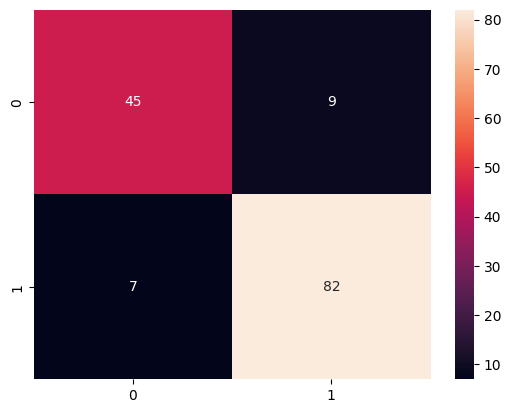

In [ ]:
sns.heatmap(matriz, annot=True)